In [1]:
import math
import numpy as np
import pandas as pd

import scikitplot
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from keras.utils import np_utils
import numpy as np 
import pandas as pd 
import seaborn as sns
from PIL import Image 
from PIL import ImageEnhance
#from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix
import tensorflow.keras
from tensorflow.keras import models
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout,Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.models import Sequential

from sklearn.model_selection import train_test_split
K.clear_session()

In [2]:
train = (r'C:\Users\student\PycharmProjects\PestClassification\Dataset\Train')
train_names =[]
train_names =[f for f in sorted(os.listdir(train))]
print(len(train_names))


5


In [3]:
os.listdir(train)

['beetle', 'Black hairy', 'corn earworm', 'Field Cricket', 'Termite']

In [4]:
print("Categories:")
for i in train_names:
    print(i)

Categories:
Black hairy
Field Cricket
Termite
beetle
corn earworm


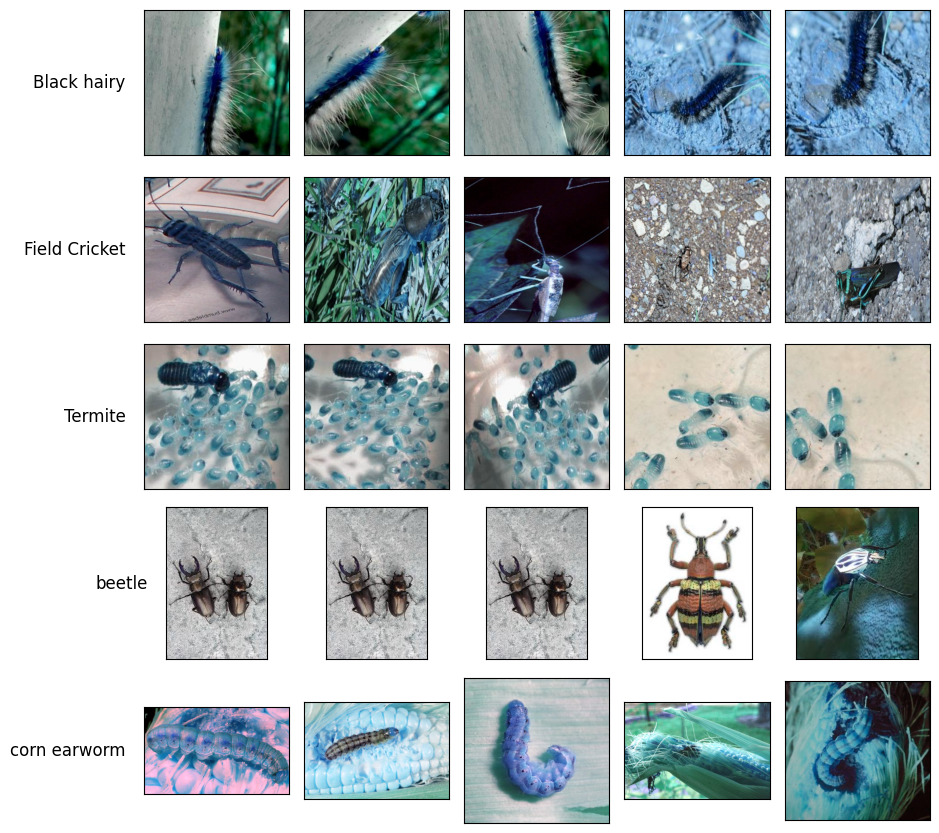

In [5]:
fig,ax = plt.subplots(nrows=5,ncols=5)
fig.set_size_inches(9.5,8.5)
fig.subplots_adjust(wspace=0.1,hspace=0.1)

for i in range(5):
    folder_path = train + '/' + str(train_names[i])
    image_names = [img for img in sorted(os.listdir(folder_path))][:5]
    
    for j in range(5):
        image_path = folder_path + '/' + image_names[j]
        image = cv2.imread(image_path) 
        ax[i,j].imshow(image)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        if j == 0:
            ax[i,j].annotate(train_names[i], xy=(0, 0.5), xytext=(-ax[i,j].yaxis.labelpad - 5,0),
                xycoords=ax[i,j].yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        
fig.tight_layout()

In [6]:
validation = (r'C:\Users\student\PycharmProjects\PestClassification\Dataset\Test')
validation_names =[]
validation_names =[f for f in sorted(os.listdir(validation))]
print(len(validation_names))


5


In [7]:
for expression in os.listdir(train):
    print(str(len(os.listdir(train + "/" + expression))) + " " + expression + " images")

240 beetle images
288 Black hairy images
96 corn earworm images
204 Field Cricket images
288 Termite images


In [10]:
from keras.preprocessing.image import ImageDataGenerator

pic_size = 256
# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(train ,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(validation,
                                                     target_size=(pic_size,pic_size),
                                                     color_mode="rgb",
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=False)
print(train_generator)
print(validation_generator)

Found 1116 images belonging to 5 classes.
Found 231 images belonging to 5 classes.


In [11]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(256,256,3,)))
model.add(Conv2D(filters=256,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25)),
model.add(BatchNormalization()),
model.add(Conv2D(filters=150,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25)),
model.add(BatchNormalization()),
model.add(Conv2D(filters=70,kernel_size = (3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25)),
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25)),
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25)),
model.add(Dense(5,activation = 'softmax'))

model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 256)     73984     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 256)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 256)     0         
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 256)    1024      
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 150)     3

In [12]:
history = model.fit(train_generator, epochs=40, validation_data=validation_generator)

Epoch 1/40
9/9 [==============================] - 468s 51s/step - loss: 23.3263 - acc: 0.2518 - val_loss: 55.0865 - val_acc: 0.1991
Epoch 2/40
9/9 [==============================] - 437s 49s/step - loss: 5.8795 - acc: 0.3029 - val_loss: 10.7966 - val_acc: 0.1818
Epoch 3/40
9/9 [==============================] - 434s 48s/step - loss: 2.1328 - acc: 0.3638 - val_loss: 1.8339 - val_acc: 0.1948
Epoch 4/40
9/9 [==============================] - 433s 48s/step - loss: 1.7224 - acc: 0.3611 - val_loss: 1.6035 - val_acc: 0.1905
Epoch 5/40
9/9 [==============================] - 431s 50s/step - loss: 1.5049 - acc: 0.3441 - val_loss: 1.5740 - val_acc: 0.2381
Epoch 6/40
9/9 [==============================] - 433s 48s/step - loss: 1.3533 - acc: 0.4382 - val_loss: 1.5546 - val_acc: 0.2727
Epoch 7/40
9/9 [==============================] - 430s 48s/step - loss: 1.2320 - acc: 0.5143 - val_loss: 1.5232 - val_acc: 0.3723
Epoch 8/40
9/9 [==============================] - 434s 48s/step - loss: 1.1777 - acc: 0

In [13]:
#keras model save

In [14]:
model.save("PestImageClassificationCNN.h5")

In [15]:
from tensorflow.keras.models import save_model
save_model(model, "PestImageClassificationCNN.h5")

In [16]:
#Keras model save in .keras format

In [17]:
model.save("PestImageClassificationCNN.keras")
reconstructed_model = tensorflow.keras.models.load_model("PestImageClassificationCNN.keras")
reconstructed_model